# Using APIs to Get Data From the Internet


**API** means Application Programmer Interface

An API is a set of instructions that describe how computers can interact with each other to request and receive information.

Some important questions we will ask that help us discover APIs is below.

|Question | In technical terms |
|:---------|:--------------------|
|Where is my data? | What is the domain? |
|How do I learn what data is available?| Where is the documentation? |
|How do I request specific data?| How do I formulate a URL for a specific purpose? |
|How do I interpret the data?| What is the structure and format of the output?|



**Let's walk through an example in the browser**

PlaceKitten!

In a browser, go to http://www.placekitten.com

|In technical terms | PlaceKitten |
|:---------|:--------------------|
|What is the domain? | http://www.placekitten.com |
|Where is the documentation?| The documentation is on the home page. |
|How do I formulate a URL for a specific purpose? | You put it in the url like http://www.placekitten/width/height |
|What is the structure and format of the output?| It's an image! |

# Accessing placekitten in python

We're going to use a special library called <code>requests</code>

In [50]:
from IPython.display import display, Image  # This line lets you display images. We'll use that in a bit.

# This line lets you use python to download data from the web.
import requests
import pandas as pd

In [55]:
# Get a 200 by 300 image from placekitten.
r = requests.get('http://www.placekitten.com/400/300')

In [56]:
# Look at the status code
r.status_code

200

In [57]:
# print the content
r.content

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xfe\x00;CREATOR: gd-jpeg v1.0 (using IJG JPEG v80), quality = 65\n\xff\xdb\x00C\x00\x0b\x08\x08\n\x08\x07\x0b\n\t\n\r\x0c\x0b\r\x11\x1c\x12\x11\x0f\x0f\x11"\x19\x1a\x14\x1c)$+*($\'\'-2@7-0=0\'\'8L9=CEHIH+6OUNFT@GHE\xff\xdb\x00C\x01\x0c\r\r\x11\x0f\x11!\x12\x12!E.\'.EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE\xff\xc0\x00\x11\x08\x01,\x01\x90\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc

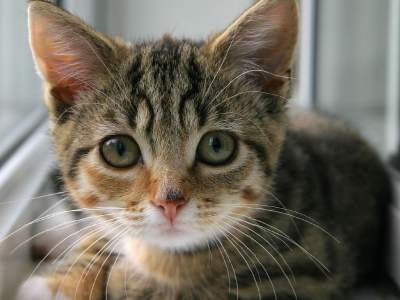

In [58]:
# Use the Image function to display the image
display(Image(r.content))

### Exercise 1

Write a function that takes in the width and height and prints an image

### Exercise 2

Can you write a loop to show several images?


In [ ]:
# Write a loop that shows multiple images


# Example 2: Getting World Times

This example introduces a slightly more complicated API. It also introduces **JSON** which is a very common data format.

The API (including some documentation) is at http://worldtimeapi.org/

In [59]:
# Download list of time zones
r = requests.get("http://worldtimeapi.org/api/timezone")
print(r.content)

b'["Africa/Abidjan","Africa/Algiers","Africa/Bissau","Africa/Cairo","Africa/Casablanca","Africa/Ceuta","Africa/El_Aaiun","Africa/Johannesburg","Africa/Juba","Africa/Khartoum","Africa/Lagos","Africa/Maputo","Africa/Monrovia","Africa/Nairobi","Africa/Ndjamena","Africa/Sao_Tome","Africa/Tripoli","Africa/Tunis","Africa/Windhoek","America/Adak","America/Anchorage","America/Araguaina","America/Argentina/Buenos_Aires","America/Argentina/Catamarca","America/Argentina/Cordoba","America/Argentina/Jujuy","America/Argentina/La_Rioja","America/Argentina/Mendoza","America/Argentina/Rio_Gallegos","America/Argentina/Salta","America/Argentina/San_Juan","America/Argentina/San_Luis","America/Argentina/Tucuman","America/Argentina/Ushuaia","America/Asuncion","America/Bahia","America/Bahia_Banderas","America/Barbados","America/Belem","America/Belize","America/Boa_Vista","America/Bogota","America/Boise","America/Cambridge_Bay","America/Campo_Grande","America/Cancun","America/Caracas","America/Cayenne","Ameri

### Exercise 3

Use the .json() function to get the response converted to a dictionary or list

In [ ]:
# Use the .json() function to get the response converted to a dictionary or list
# What did it return?


### Exercise 4

Get the time for your time zone

In [ ]:
# Your code here


### Exercise 5

Get the time for your IP address

In [ ]:
# Get the time for your IP address


# Example 3: Getting Wikipedia pages

Wikipedia also has an open API, and I want to use it to show one other tip for using the `requests` library; many APIs will take in a set of parameters, which you can pass as a parameter dictionary.

The documentation for the very extensive API is [here](https://www.mediawiki.org/wiki/API:Main_page). Many of the operations require you to authenticate (which we will cover next), but some things, like getting the content of a page, do not.

For example, the following code gets the recent changes to Wikipedia.

In [62]:
import requests

endpt = 'https://en.wikipedia.org/w/api.php'


def get_last_pages_changed(n):
    params = {'action': 'query',
          'format': 'json',
          'list': 'recentchanges',
          'rcnamespace': '0',
          'rclimit': n}
    r = requests.get(endpt, params=params)
    #print(r.json())
    #print(r.json()['query']['recentchanges'])
    result = []
    content = r.json()['query']['recentchanges']
    for page in content:
        result.append(page['title'])
    return result

In [63]:
get_last_pages_changed(n = 20)

['Félix Goethals',
 'Unterseeboot UC-48',
 'Union de défense économique',
 'Linéo de Toulouse',
 'Cataleptoneta semipinnata',
 'Dominik Szoboszlai',
 'Liste des municipalités du Veracruz',
 'Rhiannon Giddens',
 'Erwan Nicolas',
 'Fantômes - Histoires troubles',
 'Kelly Marot',
 'Trio à cordes de Roussel',
 'Masakazu Kusakabe',
 'Hussein Badreddine al-Houthi',
 'Rick Rescorla',
 'Umbañ U Kset',
 'Scytodes zapatana',
 'Valensole',
 'Fantômes - Histoires troubles',
 'Château de Lormont']

## Exercise 6

Review the documentation (and Google) to see if you can figure out how to get a list of the last users who edited the most recently edited Wikipedia page.

The function below will get you partway there. It takes in an article name, and give you the last edits.

You should:
* Use the get_last_pages_changed function and extract the last page changed
* Use the get_edits function to get the last edits of that page
* Extract the user names from the edits and make a list of them

### Bonus challenge

If you are feeling really courageous, figure out how to get all of the edits/editors for a page, not just the last 500.


In [ ]:
## Your code here

def get_edits(title):
    params = {'action':'query',
         'prop':'revisions',
         'titles': title,
              'format': 'json',
          'rvlimit': 500,
          'rvprop': 'user|timestamp'
         }
    r = requests.get(endpt, params=params)
    print(r.json())
    
get_edits('Purdue University')

# Example 4: Intro to Reddit API

## Setup
In order to use the Reddit API, you need to do two things:

1. Install [PRAW](https://praw.readthedocs.io/en/stable/) (the Python Reddit API Wrapper). This is a python library designed to make it easier to use the API (rather than using `requests` directly).

You can install PRAW in the terminal using `conda install -c conda-forge praw` or `pip install praw`

2. To use the Reddit API, you need to be authenticated, and so you need a Reddit account. You also need to create an app [This page](https://wiki.communitydata.science/Intro_to_Programming_and_Data_Science_(Fall_2023)/Reddit_authentication_setup) explains how to get a developer account, create an app, and get the `client_id` and `client_secret`.

Once you have your client keys, you should create a file called `reddit_authentication.py` in the same directory as this file. It should contain the following (replace the fake strings below with the corresponding info from your Reddit app):

```
client_id = "_anb-dsxipuqf7jA9wzeMqZ"
client_secret = "4kXxiBOFdPY1HBw4843sgm6oiTYbWkFgz"
user_agent = "python:COM 674 class project:v1.0 (by /u/yourusername)"
username = "yourusername"
password = "yourpassword"
```

In general, it is a good practice to keep your keys (which should be secret) separate from your code, which you can share. In this case, we put them in a different file and then import them.

## Using PRAW

When using PRAW, we need to authenticate. For more complicated APIs, like the Reddit API, it's important for the server to know who is makin the request, so they know what information to receive. Authentication means proving you are who you say you are.

In PRAW, we create a `Reddit` object, which handles authentication and other things. It's basically creating an authenticated session, similar to when you log into a website.

Here, we'll import the PRAW library and our authentication info from the reddit_authenticaton file. Note that there are some things you can do with the API without authenticating, but the rate limit is much higher if you are authenticated. (100 queries per minute vs 10 queries per minute)

In [ ]:
import praw
import reddit_authentication

# Create an instance called reddit. We'll use this to call the API.
reddit = praw.Reddit(client_id=reddit_authentication.client_id,
                     client_secret=reddit_authentication.client_secret,
                    user_agent = reddit_authentication.user_agent,
                    username = reddit_authentication.username,
                    password = reddit_authentication.password)

The Reddit API is powerful and complicated. We'll just do a few simple things here.

The [full documentation is here](https://praw.readthedocs.io/en/stable/) if you want to explore more.

For now, we'll show how to get the top subreddits on a topic, and how to explore the comments from a given subreddit.

First, let's find the top 10 Purdue-related subreddits.

In [ ]:
# The top 10 Purdue-related subreddits, according to reddit's search
top_purdue_subs = [x for x in reddit.subreddits.search('Purdue')][:10]

In [ ]:
for s in top_purdue_subs:
    print(f"Name: {s.display_name}\t\tSubscribers: {s.subscribers}")

I used the `.display_name` and `.subscribers` attributes of the subreddits. To see what is part of an object (like these subreddit objects), you can use the `dir` function.

In [ ]:
dir(top_purdue_subs[0])

## Our small project

Let's say that our goal is to identify the redditors who have been most active recently on the Purdue subreddit, and to see what other subreddits they are active on.

In [ ]:
commenters = {}

for comment in reddit.subreddit('Purdue').comments(limit=3000):
    if comment.author in commenters:
        commenters[comment.author] += 1
    else:
        commenters[comment.author] = 1
        

Note that when we look at our dictionary, we actually saved all of the Redditor objects for the authors. This makes it a little bit simpler to get information about those users later, but we could have also saved their usernames instead.

In [ ]:
commenters

## Exercises 7 and 8

7. Improve my code above so that it only gets comments if they have a positive score.

8. See if you can figure out how to get the "comment karma" for each of the users in our dictionary, and print out the top 10 users by comment karma.

### Getting the top users by number of comments

Ok, so let's look at the top 100 users by the number of comments posted. We can do this a few ways. One way is to use the `sorted` function on a dictionary. This will sort the keys of the dictionary by the value of the dictionary. We can then use the `reverse` parameter to sort in descending order.

In [ ]:
# Sort commenters dictionary by value
sorted_commenters = sorted(commenters.items(), key=lambda x: x[1], reverse=True)

In [ ]:
top_commenters = sorted_commenters[:100]

I happen to know that AutoModerator is a bot, so let's remove that from our list.

In [ ]:
top_commenters = top_commenters[1:]

### Getting the top subreddits that our users are active on

In [ ]:
subreddits = {}

for commenter in top_commenters:
    user = commenter[0]
    # Get the user's 100 most recent comments
    for comment in user.comments.new(limit=100):
        subreddit = comment.subreddit.display_name
        if subreddit == 'Purdue':
            continue
        if subreddit in subreddits:
            subreddits[subreddit] += 1
        else:
            subreddits[subreddit] = 1

### A note on rate limits

You may have noticed that that took a long time. That's because we are making a lot of requests to the Reddit API. The Reddit API has a rate limit of 100 requests per minute. If you go over the limit, then Reddit sends you a message asking you to wait. PRAW actually handles this without our intervention, but it does mean that it's hard to tell how long things will take. One approach is to at least print out the commenter name, for example, so you can tell how quickly the queries are running. If they are going too slowly, then you may want to change the limits. For example, we got 100 comments per user in this code, but that may take multiple queries, so reducing that number could speed things up.

When using other libraries, including `requests`, you will often have to write code to handle rate limits yourself.

### Sorting the subreddits

Let's just do the same thing we did before, but this time sort the subreddits by the number of comments.

In [ ]:
sorted_subreddits = sorted(subreddits.items(), key=lambda x: x[1], reverse=True)

In [ ]:
sorted_subreddits[:20]

## Exercise 9 (Challenge Exercise)

Instead of storing the number of total comments per subreddit, store the number of our top_commenters who contribute to each subreddit. In other words, if User A comments on Subreddit A twice, my code counts that twice. Instead, I want to count that only once.

Hint: This is tricky. One approach would be to make a list of subreddits that each commenter has commented in, and then change that into a set. 

## Additional Exercises

10. Get the last comments across all subreddits. Figure out which subreddits were most actively commented in.
11. Get the last comments across all subreddits. Figure out which users were most active.
12. Find the top 5 posts on the Purdue subreddit over the last year ([HINT](https://praw.readthedocs.io/en/stable/code_overview/models/subreddit.html#praw.models.Subreddit.top)). Get all of the comments for each of those posts.